In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd
import matplotlib.pyplot as plt

import folium
import pycaret
from pycaret.classification import *

#from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv("Washington_accidents.csv")
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-146697,MapQuest,201.0,2,2016-12-05 20:11:21,2016-12-05 20:40:30,33.789307,-82.897705,0.01,Accident on GA-10 / US-78 Eastbound at County ...,Lexington Rd,R,Washington,30673-2835,US,US/Eastern,KIIY,2016-12-05 20:15:00,55.0,55.0,100.0,29.29,7.0,E,5.0,0.0,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-148071,MapQuest,201.0,2,2016-12-27 13:43:37,2016-12-27 14:13:13,33.833038,-82.750763,0.01,Right hand shoulder blocked due to accident on...,Tignall Rd,R,Washington,30673-4903,US,US/Eastern,KIIY,2016-12-27 13:35:00,72.0,72.0,78.0,29.46,10.0,SW,9.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-148602,MapQuest,201.0,2,2017-01-05 15:45:48,2017-01-05 16:15:22,33.782990,-82.845123,0.01,Right hand shoulder blocked due to accident on...,Swann Rd,L,Washington,30673-2704,US,US/Eastern,KIIY,2017-01-05 15:55:00,61.0,61.0,45.0,29.16,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-148771,MapQuest,201.0,2,2017-01-09 17:29:13,2017-01-09 17:58:28,33.749084,-82.760986,0.01,Accident on GA-10 / US-78 Eastbound around Cam...,Campbell St,R,Washington,30673-1319,US,US/Eastern,KIIY,2017-01-09 17:35:00,39.0,39.0,49.0,29.87,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-162290,MapQuest,201.0,2,2016-10-21 16:48:28,2016-10-21 17:16:46,41.337139,-91.715836,0.01,Accident on IA-1 at IA-92.,Highway 92,R,Washington,52353,US,US/Central,KAWG,2016-10-21 16:55:00,NaN,NaN,NaN,NaN,NaN,North,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df["Severity"].value_counts()

2    3663
3    1280
4     784
1      43
Name: Severity, dtype: int64

In [4]:
df.shape

(5770, 44)

In [5]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile

In [6]:
train_data = df.sample(frac=0.95, random_state=95)
test_data = df.drop(train_data.index)

In [7]:
test_data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,A-148602,MapQuest,201.0,2,2017-01-05 15:45:48,2017-01-05 16:15:22,33.782990,-82.845123,0.01,Right hand shoulder blocked due to accident on...,Swann Rd,L,Washington,30673-2704,US,US/Eastern,KIIY,2017-01-05 15:55:00,61.0,61.0,45.0,29.16,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-148771,MapQuest,201.0,2,2017-01-09 17:29:13,2017-01-09 17:58:28,33.749084,-82.760986,0.01,Accident on GA-10 / US-78 Eastbound around Cam...,Campbell St,R,Washington,30673-1319,US,US/Eastern,KIIY,2017-01-09 17:35:00,39.0,39.0,49.0,29.87,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
30,A-228695,MapQuest,201.0,2,2016-12-01 07:47:34,2016-12-01 08:16:42,38.929035,-77.073746,0.01,Left lane blocked due to accident on Massachus...,Cathedral Ave NW,R,Washington,20016,US,US/Eastern,KDCA,2016-12-01 07:52:00,53.1,NaN,59.0,29.77,10.0,NW,12.7,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
45,A-229971,MapQuest,201.0,2,2016-12-07 18:44:35,2016-12-07 19:14:03,38.861572,-76.998871,0.00,Accident on Firth Sterling Ave at Sumner Rd.,Sumner Rd SE,R,Washington,20020,US,US/Eastern,KWBC,2016-12-07 19:00:00,NaN,NaN,NaN,NaN,NaN,North,NaN,NaN,NaN,False,False,True,False,False,False,True,False,False,False,False,False,False,Night,Night,Night,Night
91,A-233236,MapQuest,201.0,3,2016-12-29 05:53:47,2016-12-29 06:38:13,38.863598,-76.996849,0.01,Accident on I-295 Northbound near Exit 3B Howa...,Howard Rd SE,R,Washington,20020-5805,US,US/Eastern,KWBC,2016-12-29 06:00:00,NaN,NaN,NaN,NaN,NaN,North,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day


In [8]:
train_data.shape, test_data.shape

((5482, 44), (288, 44))

In [9]:
clf = setup(train_data, 
            target = 'Severity', 
            session_id=123, 
            log_experiment=True, 
            experiment_name='crash-severity'
           )


,Description,Value
0,session_id,123
1,Target,Severity
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original Data,"(5482, 44)"
5,Missing Values,True
6,Numeric Features,10
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8441,0.9267,0.7192,0.8407,0.8403,0.6970,0.6996,31.6060
lightgbm,Light Gradient Boosting Machine,0.8332,0.9245,0.6987,0.8304,0.8296,0.6765,0.6791,0.2550
rf,Random Forest Classifier,0.8212,0.9233,0.6288,0.8243,0.8079,0.6260,0.6470,0.8680
et,Extra Trees Classifier,0.8173,0.9171,0.6490,0.8215,0.8050,0.6192,0.6389,1.2170
catboost,CatBoost Classifier,0.8027,0.9092,0.5478,0.7981,0.7924,0.6060,0.6145,8.8610
dt,Decision Tree Classifier,0.7946,0.8049,0.6467,0.7934,0.7930,0.6106,0.6114,0.1320
gbc,Gradient Boosting Classifier,0.7936,0.8970,0.5347,0.7889,0.7792,0.5755,0.5905,9.9940
ridge,Ridge Classifier,0.7915,0.0000,0.5633,0.7859,0.7855,0.5882,0.5918,0.2620
lr,Logistic Regression,0.7594,0.8693,0.5334,0.7504,0.7522,0.5252,0.5285,15.9130
svm,SVM - Linear Kernel,0.6625,0.0000,0.3967,0.7206,0.6214,0.2954,0.3451,2.4020


In [14]:
best_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='auto', validate_parameters=1, verbosity=0)

In [10]:
xgboost = create_model('xgboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8411,0.9250,0.7166,0.8397,0.8392,0.6926,0.6936
1,0.8516,0.9372,0.7169,0.8501,0.8474,0.7061,0.7107
2,0.8542,0.9329,0.7416,0.8504,0.8480,0.7173,0.7213
3,0.8438,0.9301,0.5936,0.8390,0.8402,0.6970,0.6987
4,0.8568,0.9286,0.8483,0.8548,0.8521,0.7162,0.7216
5,0.8490,0.9399,0.7343,0.8508,0.8483,0.7154,0.7161
6,0.8490,0.9197,0.8539,0.8442,0.8453,0.7092,0.7108
7,0.8590,0.9356,0.6174,0.8524,0.8553,0.7278,0.7286
8,0.8094,0.8942,0.5429,0.7997,0.8009,0.6189,0.6245
9,0.8277,0.9236,0.8260,0.8256,0.8260,0.6695,0.6702


In [17]:
xgboost_tuned = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8385,0.9276,0.7173,0.8374,0.8374,0.6898,0.6904
1,0.8490,0.9312,0.7251,0.8470,0.8470,0.7095,0.7103
2,0.8411,0.9257,0.7236,0.8368,0.8363,0.6923,0.6951
3,0.8438,0.9324,0.5917,0.8387,0.8404,0.6972,0.6985
4,0.8464,0.9250,0.8386,0.8437,0.8414,0.6965,0.7015
5,0.8411,0.9331,0.7351,0.8454,0.8423,0.7052,0.7057
6,0.8438,0.9154,0.7296,0.8405,0.8390,0.6977,0.7007
7,0.8329,0.9254,0.6015,0.8298,0.8312,0.6795,0.6798
8,0.8120,0.8970,0.5533,0.8028,0.8057,0.6309,0.6335
9,0.8355,0.9224,0.8402,0.8362,0.8347,0.6872,0.6881


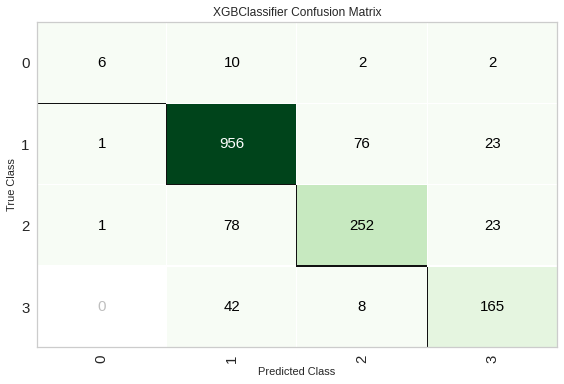

In [12]:
plot_model(xgboost, plot = 'confusion_matrix')


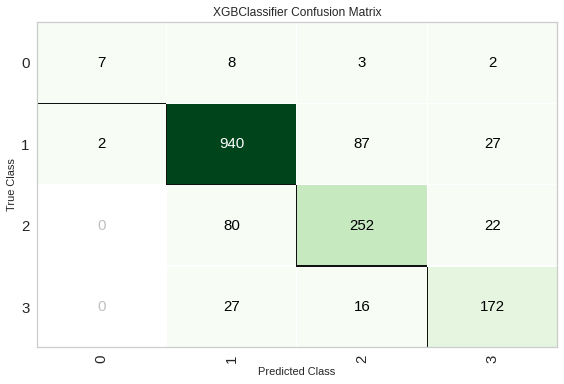

In [18]:
plot_model(xgboost_tuned, plot = 'confusion_matrix')


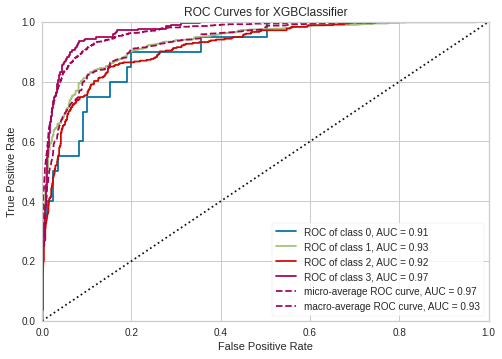

In [14]:
plot_model(xgboost)


In [20]:
predict_model(xgboost_tuned
             );


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8334,0.9278,0.6880,0.8337,0.8325,0.6819,0.6820


In [21]:
final = finalize_model(xgboost_tuned)


In [22]:
unseen_predictions = predict_model(final, data=test_data)
unseen_predictions.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Label,Score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9955
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9388
2,A-148602,MapQuest,201.0,2.0,2017-01-05 15:45:48,2017-01-05 16:15:22,33.782990,-82.845123,0.01,Right hand shoulder blocked due to accident on...,...,False,False,False,False,Day,Day,Day,Day,2.0,0.9994
3,A-148771,MapQuest,201.0,2.0,2017-01-09 17:29:13,2017-01-09 17:58:28,33.749084,-82.760986,0.01,Accident on GA-10 / US-78 Eastbound around Cam...,...,False,False,False,False,Day,Day,Day,Day,2.0,0.9966
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6324


In [24]:
unseen_predictions.tail()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Label,Score
5705,A-3475777,Bing,NaN,2.0,2019-06-18 18:07:29,2019-06-18 18:37:04,38.873667,-76.978379,0.190,At Pennsylvania Ave - Accident. Right lane blo...,...,False,False,False,False,Day,Day,Day,Day,3.0,NaN
5717,A-3480264,Bing,NaN,2.0,2019-06-28 06:46:41,2019-06-28 07:16:26,38.897430,-76.950040,0.291,At Benning Rd - Accident. Left lane blocked.,...,False,False,False,False,Day,Day,Day,Day,2.0,NaN
5739,A-3493767,Bing,NaN,4.0,2019-07-12 13:29:32,2019-07-12 13:58:21,40.198900,-80.270100,1.445,Closed at Lynn Portal Rd - Road closed due to ...,...,False,False,True,False,Day,Day,Day,Day,4.0,NaN
5748,A-3498660,Bing,NaN,4.0,2019-07-23 19:17:32,2019-07-23 19:45:56,38.902510,-76.998992,0.002,Closed at 6th St NE - Road closed due to accid...,...,False,False,False,False,Day,Day,Day,Day,2.0,NaN
5765,A-3507484,Bing,NaN,4.0,2019-08-10 23:40:41,2019-08-11 00:09:54,38.943978,-77.026040,0.078,Closed at Allison St NW - Road closed due to a...,...,False,False,False,False,Night,Night,Night,Night,4.0,NaN
